<a href="https://colab.research.google.com/github/zoe-zhang99/predict_absenteeism_at_work/blob/main/predict_absenteeism_at_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('Absenteeism_at_work.xls')

In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [ ]:
df.shape

(740, 21)

In [ ]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
df.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [ ]:
X = df.drop(['Absenteeism time in hours','ID'], axis='columns')
y = df[['Absenteeism time in hours']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcffec34ed0>]],
      dtype=object)

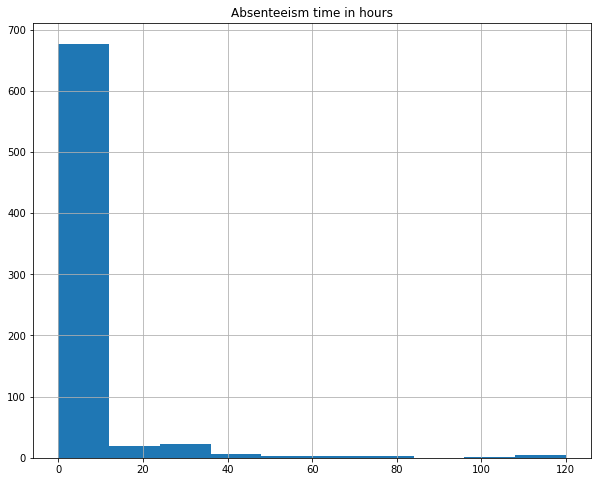

In [ ]:
y.hist(figsize=(10, 8))

In [ ]:
df['Absenteeism time in hours'].mean()

6.924324324324324

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcffed35210>,
      dtype=object)

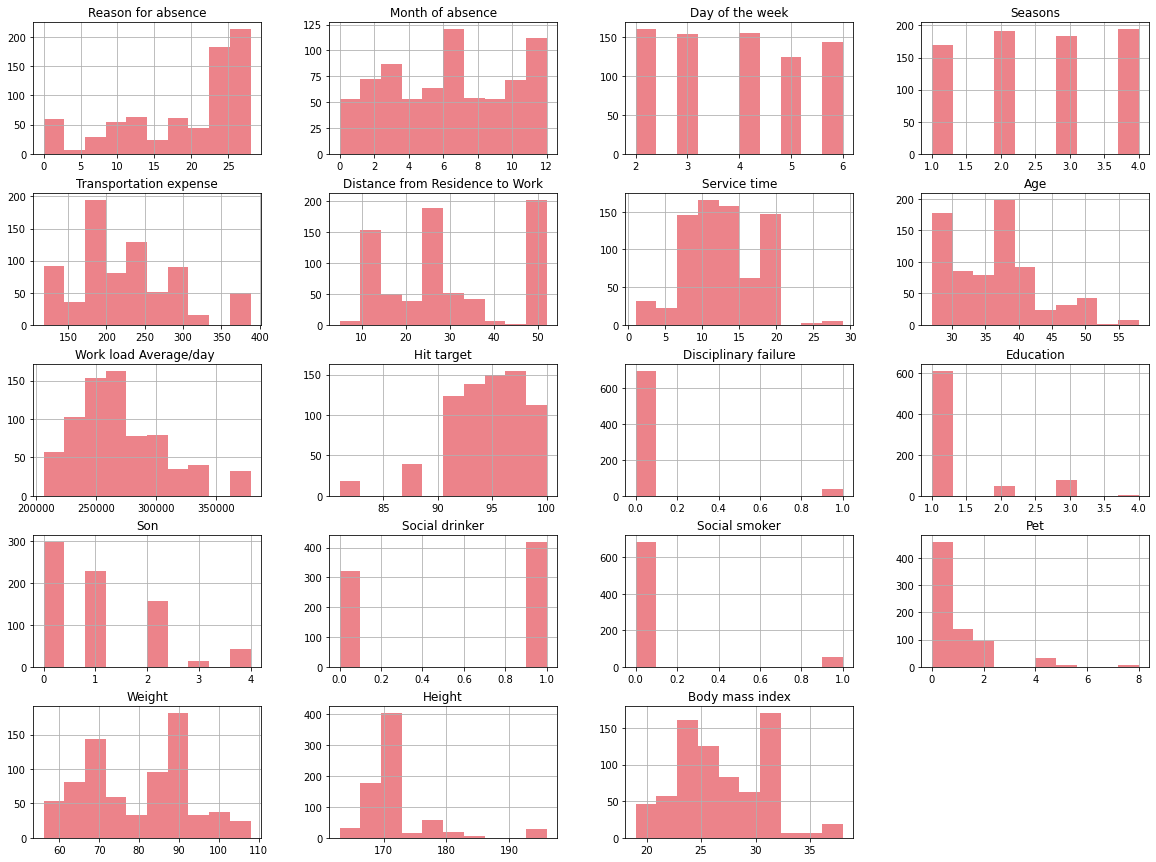

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#vals = np.size(X.iloc[:, i].unique())
#if vals >= 100:
#  vals = 100

X.hist(figsize=(20, 15), color = '#ec838a')

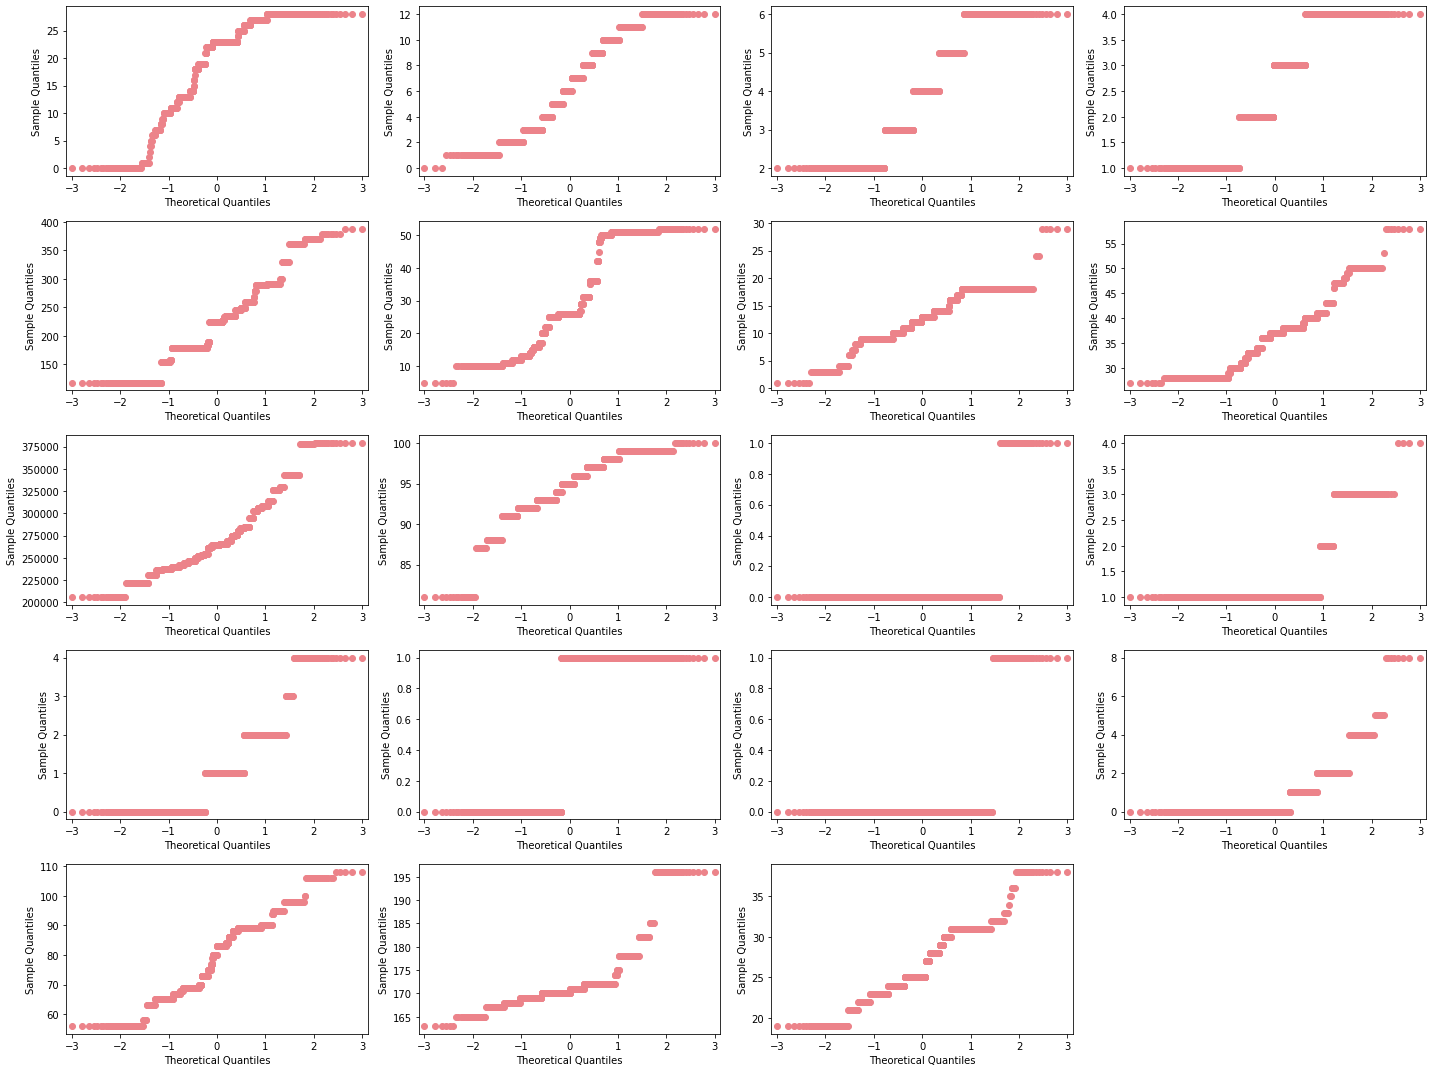

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize = (20, 15))
for n, col in enumerate(X.columns):
    plt.subplot(5,4, n+1)
    qqplot(X[col], ax = plt.gca(), color = '#ec838a')
    ax.set_title(X.columns.values[n])
plt.tight_layout()

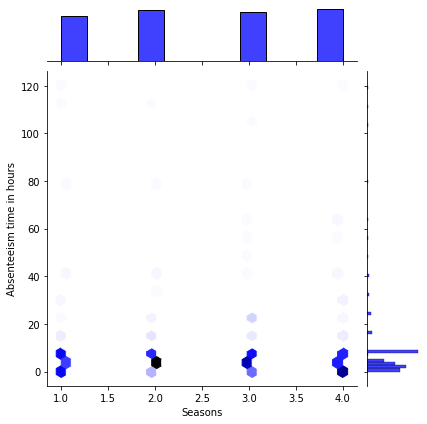

In [ ]:
import seaborn as sns
sns.jointplot(x='Seasons',y='Absenteeism time in hours',data=df,kind='hex',color='blue')

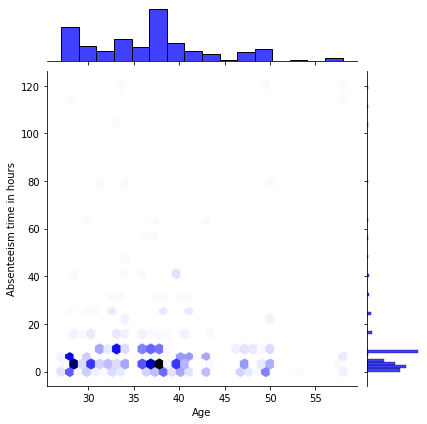

In [ ]:
sns.jointplot(x='Age',y='Absenteeism time in hours',data=df,kind='hex',color='blue')

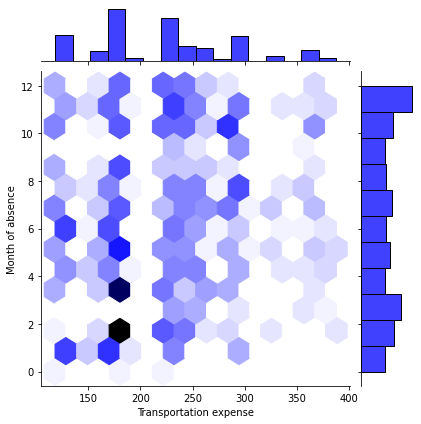

In [ ]:
sns.jointplot(x='Transportation expense',y='Month of absence',data=df,kind='hex',color='blue')

<Figure size 864x432 with 0 Axes>

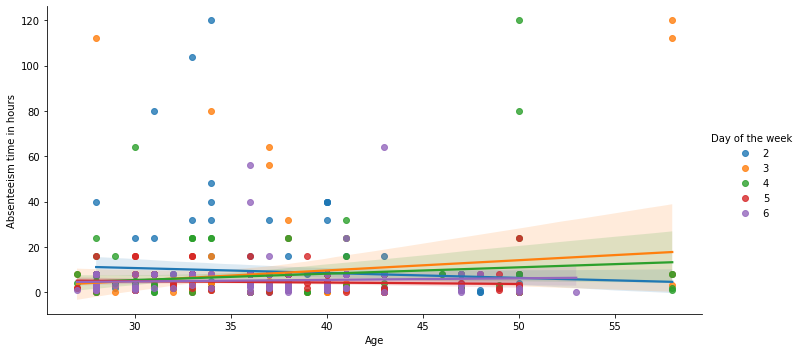

In [ ]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Day of the week',size=5,aspect=2)

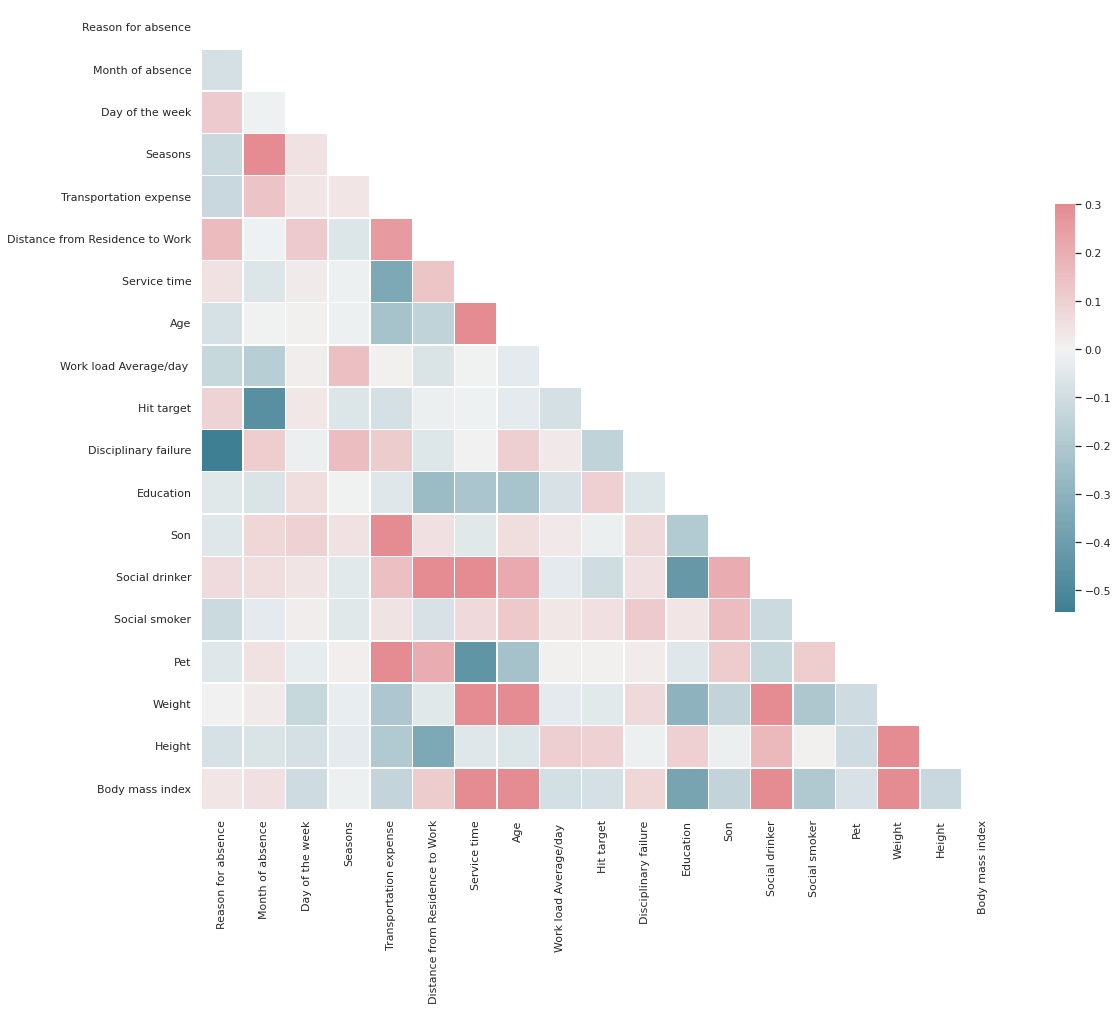

In [ ]:
import seaborn as sns
sns.set(style="white")
corr = X.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#normalize the data
from sklearn import preprocessing
d = preprocessing.normalize(X)
normalized_X = pd.DataFrame(d, columns = X.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfe9ad7890>,
      dtype=object)

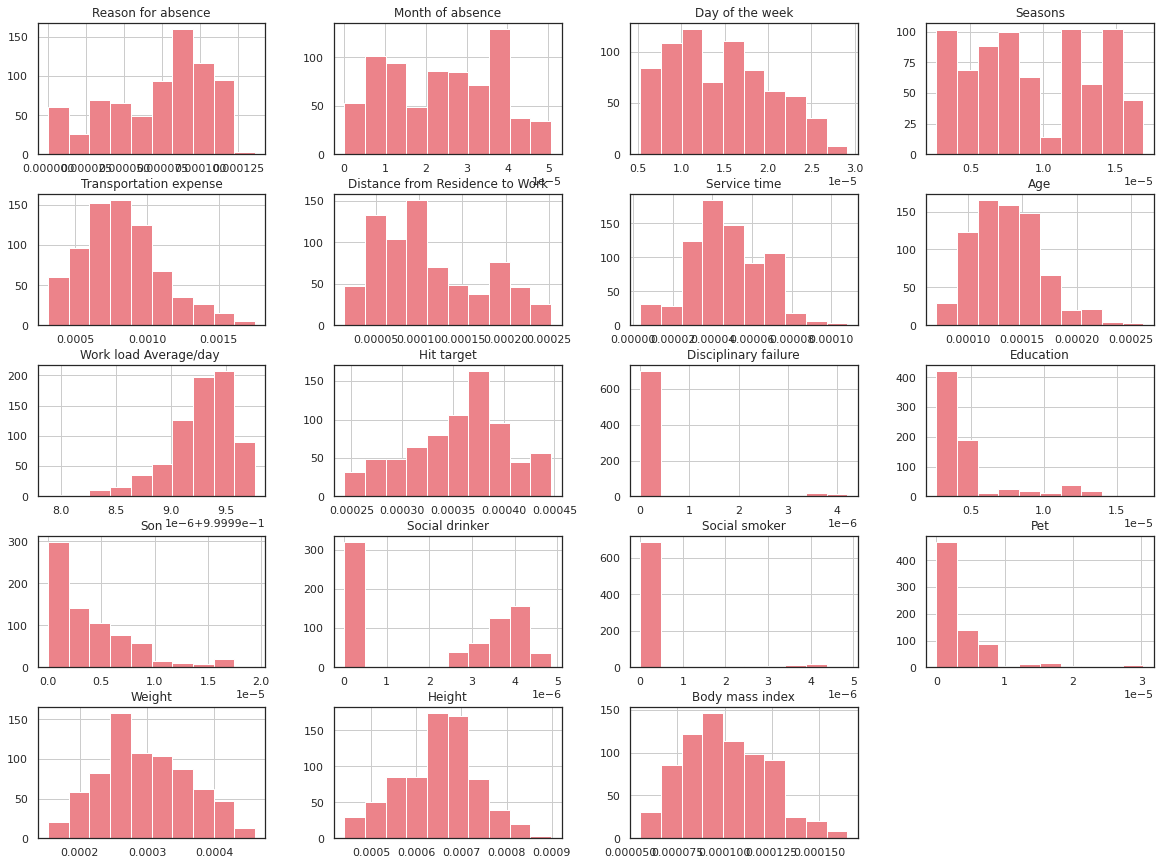

In [ ]:
normalized_X.hist(figsize=(20, 15), color = '#ec838a')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

calc_vif(X)

,variables,VIF
0,Reason for absence,9.688021
1,Month of absence,7.653720
2,Day of the week,9.252918
3,Seasons,8.653673
4,Transportation expense,20.925884
5,Distance from Residence to Work,12.598648
6,Service time,30.532959
7,Age,83.121728
8,Work load Average/day,60.360748
9,Hit target,864.839815


In [ ]:
calc_vif(normalized_X)

,variables,VIF
0,Reason for absence,10.196811
1,Month of absence,7.787792
2,Day of the week,9.195531
3,Seasons,7.933285
4,Transportation expense,21.916811
5,Distance from Residence to Work,13.214008
6,Service time,31.530134
7,Age,84.425089
8,Work load Average/day,68.812880
9,Hit target,914.351933


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['ID','Absenteeism time in hours'], axis=1)
y = df["Absenteeism time in hours"]
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'cumulative explained variance')

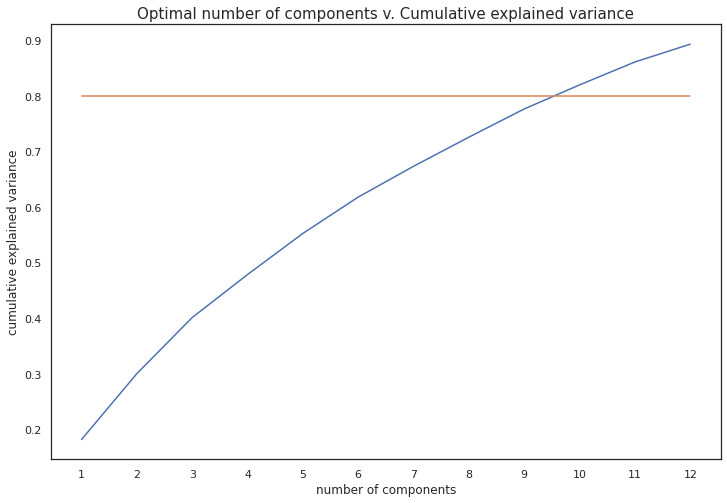

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
# The PCA model
pca = PCA(n_components=12) # estimate only 2 PCs
X_new = pca.fit(x_train) # project the original data into the PCA space
explained_variance_ratios = X_new.explained_variance_ratio_
cum_evr = np.cumsum(X_new.explained_variance_ratio_)
plt.subplots(figsize=(12, 8))

plt.plot(cum_evr)
plt.plot(np.arange(0, 12), [0.8]*12)
plt.xticks(np.arange(len(cum_evr)), np.arange(1, len(cum_evr)+1))
plt.title('Optimal number of components v. Cumulative explained variance', fontsize = 15)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'Component #2')

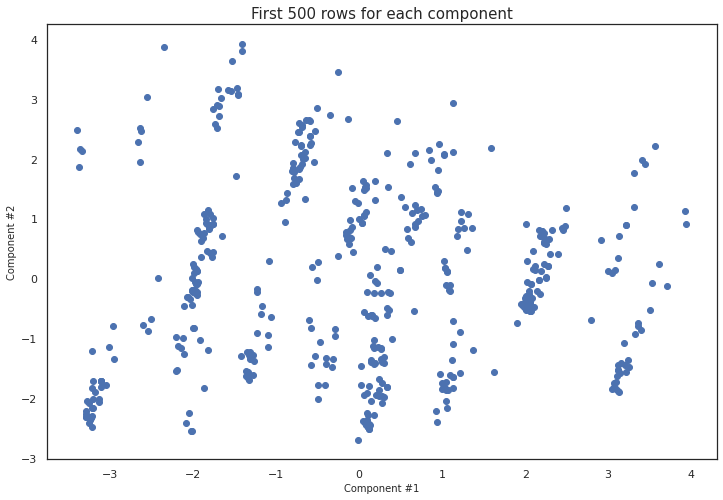

In [ ]:
# Visualize 2 components of PCA when applied to the training data (2 points)
pca = PCA(n_components = 2)
#pca_plot = x_train[:5000]
pca_plot = StandardScaler().fit_transform(x_train)
pca_plot = pca.fit_transform(pca_plot)

#'cpnt1' is x, 'cpnt2' is y
plt.subplots(figsize=(12, 8))
plt.scatter(pca_plot[:500,0],pca_plot[:500,1])
plt.title("First 500 rows for each component", fontsize = 15)
plt.xlabel("Component #1", fontsize = 10)
plt.ylabel("Component #2", fontsize = 10)

In [ ]:
print(pca.explained_variance_ratio_)

[0.17906563 0.11810429]


In [ ]:
pca = PCA(n_components=10) 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

### Regression Models

#### (a) Linear Regression (by default ridge)

Use the `LinearRegression` class in scikit-learn to perform Linear Regression. Initialize the model with default parameters, fit the model to the training set, and then make predictions on the testing set.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train_pca, y_train)
score = reg.score(x_train_pca, y_train)
y_pred = reg.predict(x_test_pca)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# printing values
print('Score:' ,score)
print('Slope:' ,reg.coef_)
print('Intercept:', reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Score: 0.05943023085423027
Slope: [ 0.08879963 -0.08831559  0.66339299  0.71565366  1.42653073 -1.29982746
 -0.98283837 -0.4156026   1.01266176 -1.82650731]
Intercept: 7.114864864864865
Root mean squared error:  115.35173389226259
R2 score:  -0.058528160998139844


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x_train_pca, y_train, cv=10)
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Cross-Validation score mean: -1.16% (+/-10.29)


In [ ]:
#sklearn modules for Model Selection:
from sklearn.linear_model import LinearRegression
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import Ridge
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [ ]:
models = []
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, x_train_pca, y_train, cv=kfold, scoring='accuracy')

  acc_results.append(cv_acc_results)

  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_acc_results.mean()*100, 2),
                          round(cv_acc_results.std()*100, 2)
                          ]
  i += 1
    
model_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
1,Kernel SVM,44.08,3.78
0,SVC,43.91,4.92
5,Random Forest,42.71,6.07
2,KNN,39.01,3.89
3,Gaussian NB,37.84,4.69
4,Decision Tree Classifier,32.59,5.77


In [ ]:
X = df.drop(['ID','Absenteeism time in hours'], axis=1)
y = df["Absenteeism time in hours"]
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Optimal number of features : 15
Best features : Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 18], dtype='int64')


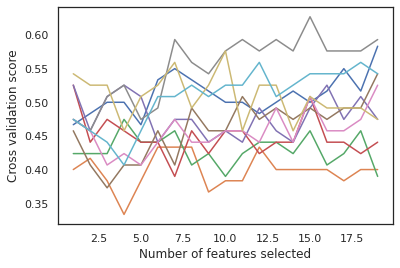

In [ ]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10, scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(x_train).columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=10)
X_selected = fs.fit_transform(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
models = []
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

  acc_results.append(cv_acc_results)

  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_acc_results.mean()*100, 2),
                          round(cv_acc_results.std()*100, 2)
                          ]
  i += 1
    
model_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
1,Kernel SVM,47.63,5.24
0,SVC,44.75,6.35
5,Random Forest,43.40,4.67
2,KNN,41.03,5.00
4,Decision Tree Classifier,40.69,5.80
3,Gaussian NB,18.08,5.47


### Classification Models

a) multi-class regression

In [ ]:
X = df.drop(['ID','Absenteeism time in hours'], axis=1)
y = df[["Absenteeism time in hours"]]

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

sc = StandardScaler()
X = sc.fit_transform(X)
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y = est.fit_transform(y)
X, y = shuffle(X, y)

#y = sc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=10) 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfdd1329d0>]],
      dtype=object)

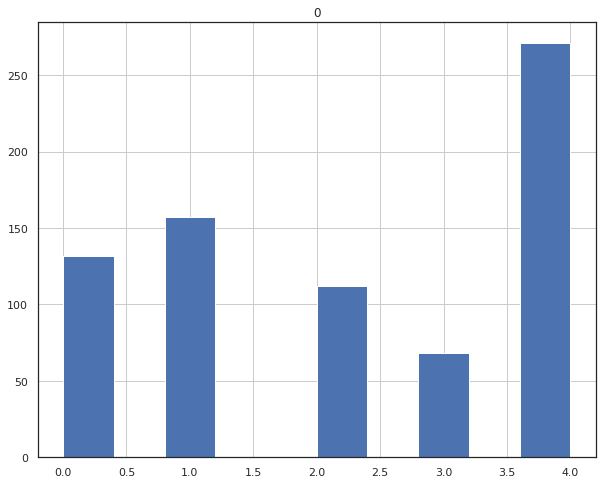

In [ ]:
pd.DataFrame(y).hist(figsize=(10, 8))

In [ ]:
models = []
models.append(('Logistic Regression', linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, x_train_pca, y_train, cv=kfold, scoring='accuracy')
  acc_results.append(cv_acc_results)
  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_acc_results.mean()*100, 2),
                          round(cv_acc_results.std()*100, 2)
                          ]
  i += 1
    
model_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
6,Random Forest,51.32,7.59
1,SVC,50.67,6.78
2,Kernel SVM,49.48,5.02
5,Decision Tree Classifier,46.27,7.24
0,Logistic Regression,45.42,6.97
3,KNN,44.93,6.82
4,Gaussian NB,43.74,5.40


No handles with labels found to put in legend.


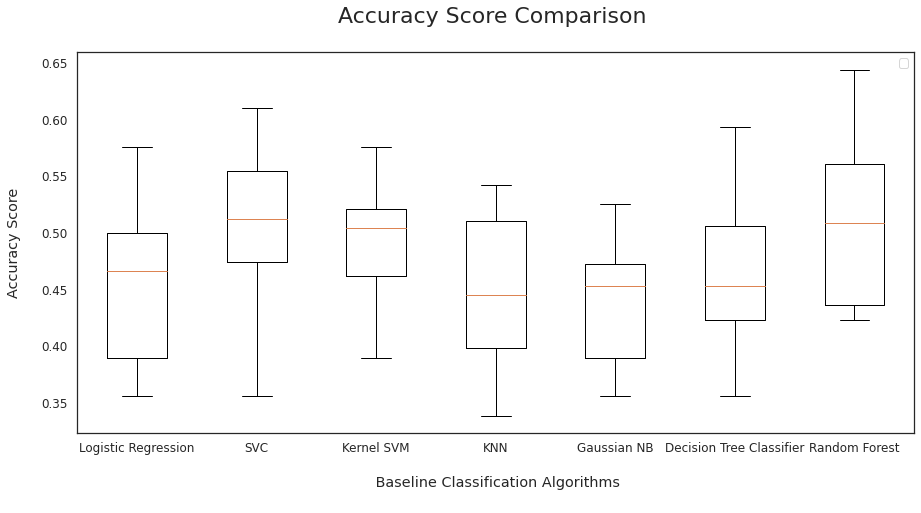

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", fontsize = "12")
plt.yticks(rotation=0, horizontalalignment="right", fontsize = "medium")
plt.show()

No handles with labels found to put in legend.


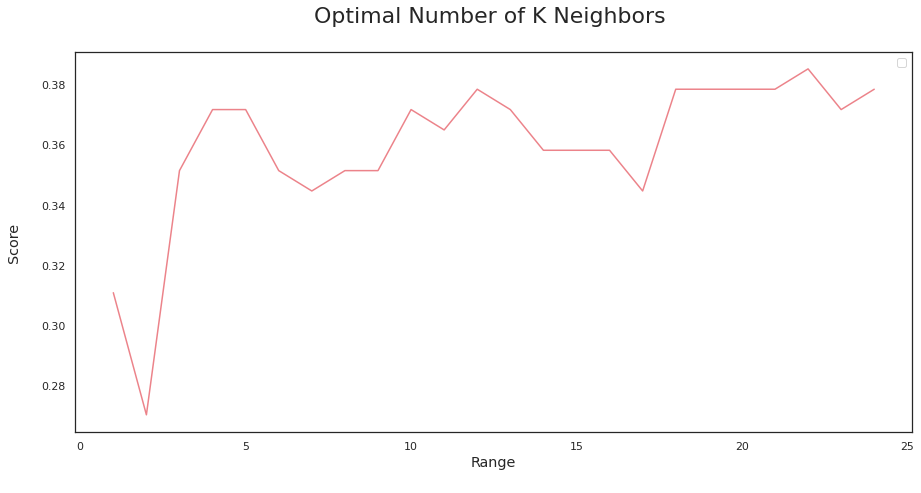

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(x_train_pca,y_train)
    score_array.append(knn_loop.score(x_test_pca,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

No handles with labels found to put in legend.


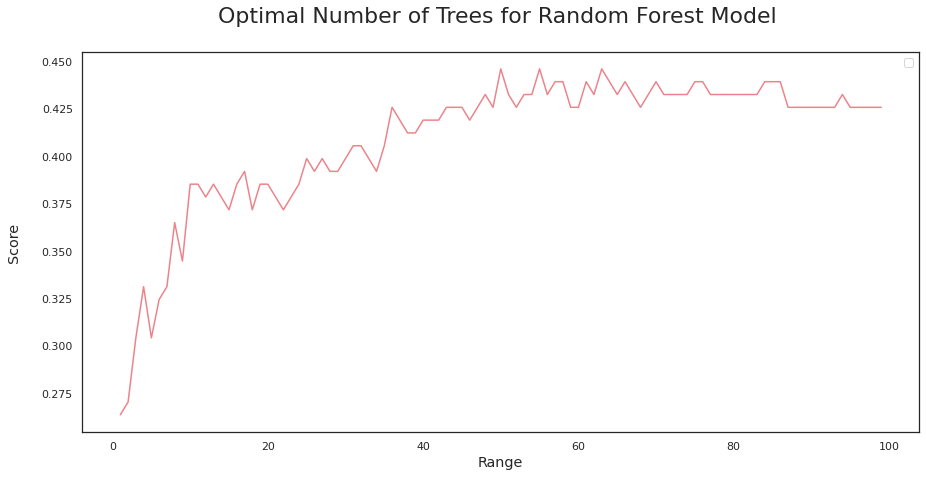

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train_pca,y_train)
    score_array.append(rf_loop.score(x_test_pca,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

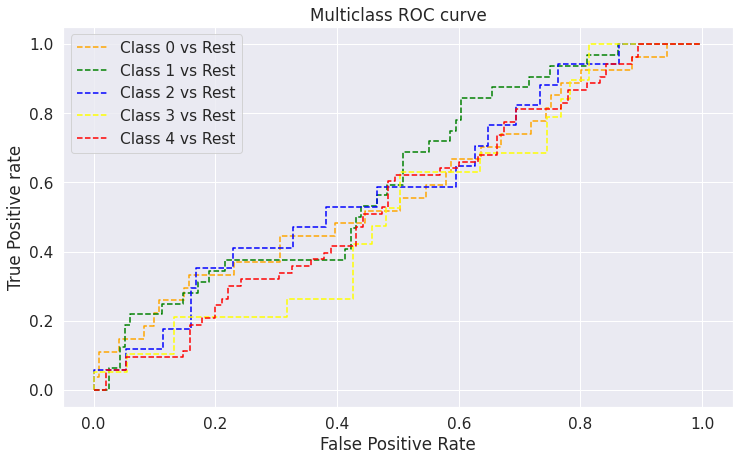

In [ ]:
# roc curve for classes
svc = SVC(kernel = 'linear', random_state = 0,probability=True)
svc.fit(x_train_pca, y_train)

#predicting the data
y_pred_rf = svc.predict(x_test_pca)
y_prob_pred_rf = svc.predict_proba(x_test_pca)


fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_rf[:,i], pos_label=i)
    
# plotting  
fig = plt.figure(figsize=(12, 7))  
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Optimal number of features : 3
Best features : Int64Index([0, 7, 8], dtype='int64')


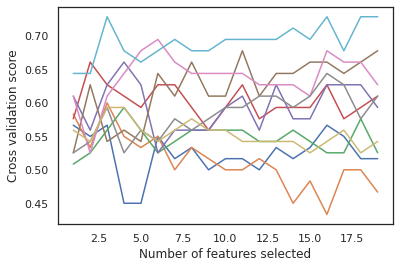

In [ ]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10, scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(x_train).columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
fs = SelectKBest(score_func=f_regression, k=13)
X_selected = fs.fit_transform(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
models = []
models.append(('Logistic Regression', linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=21, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, x_train_pca, y_train, cv=kfold, scoring='accuracy')
  acc_results.append(cv_acc_results)
  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_acc_results.mean()*100, 2),
                          round(cv_acc_results.std()*100, 2)
                          ]
  i += 1
    
model_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
1,SVC,50.67,6.78
6,Random Forest,49.97,6.79
2,Kernel SVM,49.48,5.02
5,Decision Tree Classifier,46.27,7.24
3,KNN,45.43,5.74
0,Logistic Regression,45.42,6.97
4,Gaussian NB,43.74,5.40


b) binary classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(['ID','Absenteeism time in hours'], axis=1)
y = np.where(df["Absenteeism time in hours"] > df["Absenteeism time in hours"].median(), 1, 0)
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=10) 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [ ]:
pca = PCA(n_components=10) 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, x_train_pca, y_train, cv=kfold, scoring='accuracy')
  # roc_auc scoring:
  cv_auc_results = model_selection.cross_val_score(model, x_train_pca, y_train, cv=kfold, scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_auc_results.mean()*100, 2),
                          round(cv_auc_results.std()*100, 2),
                          round(cv_acc_results.mean()*100, 2),
                          round(cv_acc_results.std()*100, 2)
                          ]
  i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Kernel SVM,81.80,4.24,74.32,5.97
6,Random Forest,79.66,5.77,72.45,5.99
3,KNN,77.97,5.24,72.62,6.66
4,Gaussian NB,68.98,5.43,64.52,4.01
0,Logistic Regression,66.19,6.81,63.68,6.78
1,SVC,65.65,8.07,64.86,5.96
5,Decision Tree Classifier,65.09,5.27,64.51,5.84


No handles with labels found to put in legend.


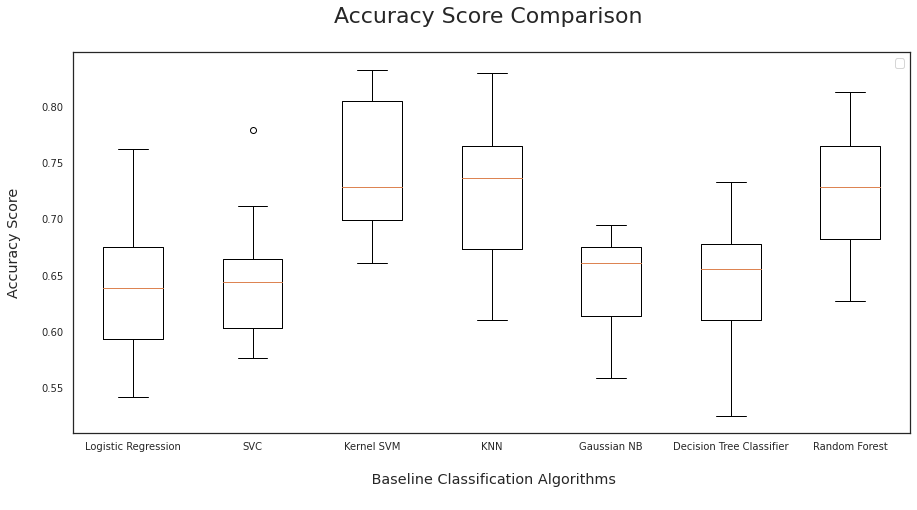

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", fontsize = "10")
plt.yticks(rotation=0, horizontalalignment="right", fontsize = "10")
plt.show()

No handles with labels found to put in legend.


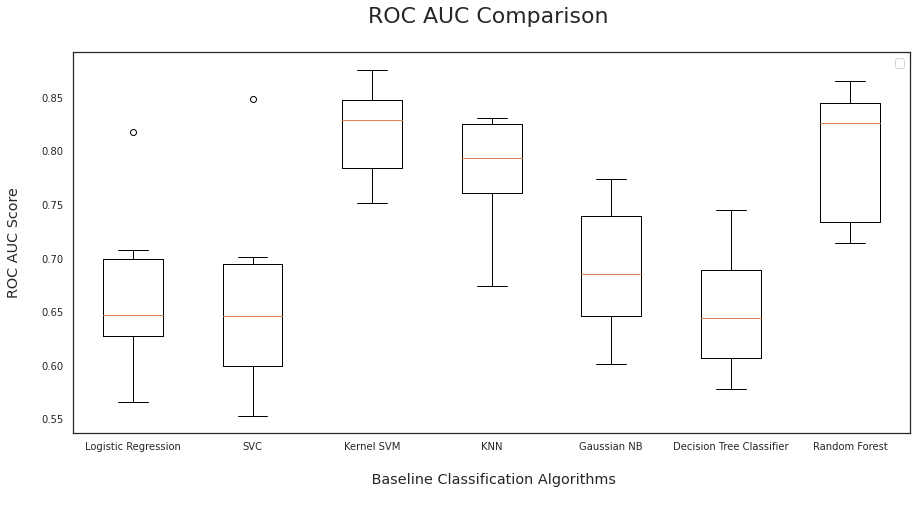

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", fontsize = "10")
plt.yticks(rotation=0, horizontalalignment="right", fontsize = "10")
plt.show()

No handles with labels found to put in legend.


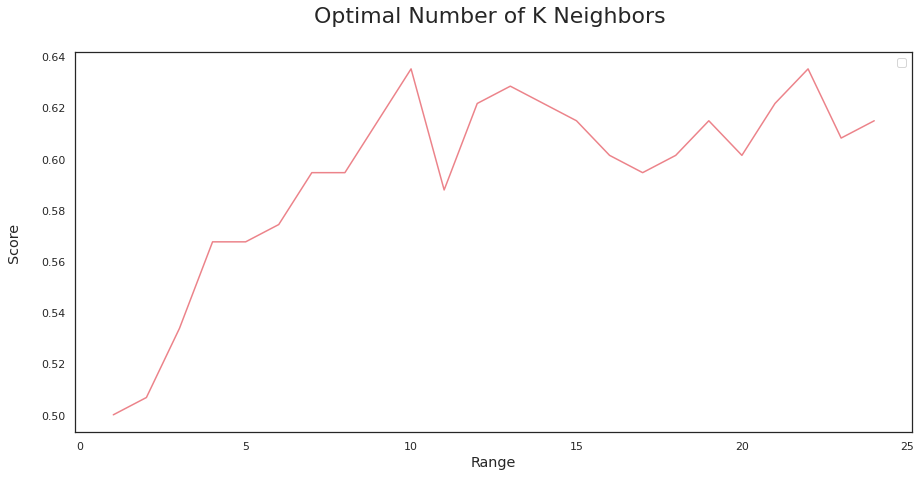

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(x_train_pca,y_train)
    score_array.append(knn_loop.score(x_test_pca,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

No handles with labels found to put in legend.


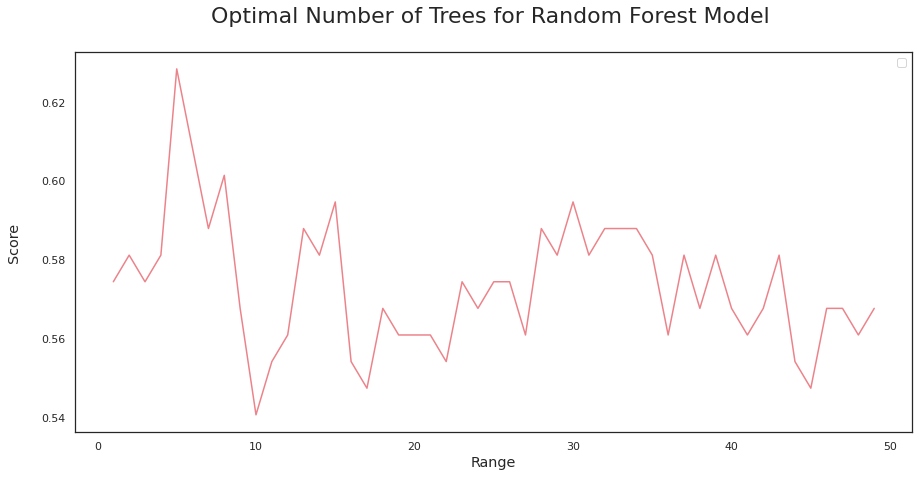

In [ ]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train_pca,y_train)
    score_array.append(rf_loop.score(x_test_pca,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,50),score_array, color = '#ec838a')
plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
X = df.drop(['ID','Absenteeism time in hours'], axis=1)
y = np.where(df["Absenteeism time in hours"] > df["Absenteeism time in hours"].median(), 1, 0)
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=10) 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_pca, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test_pca)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.560811   0.522727  0.343284  0.414414   0.36859


In [ ]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train_pca, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.560811   0.522727  0.343284  0.414414   0.36859
1         SVM (Linear)  0.560811   0.522727  0.343284  0.414414   0.36859


In [ ]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(x_train_pca, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(x_test_pca)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]], 
                             columns = ['Model','Accuracy', 'Precision', 'Recall','F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2  K-Nearest Neighbours  0.635135   0.603175  0.567164  0.584615  0.574018
0   Logistic Regression  0.560811   0.522727  0.343284  0.414414  0.368590
1          SVM (Linear)  0.560811   0.522727  0.343284  0.414414  0.368590


In [ ]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train_pca, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(x_test_pca)
#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]], 
                             columns = ['Model','Accuracy', 'Precision', 'Recall','F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.635135   0.603175  0.567164  0.584615  0.574018
3            Kernel SVM  0.614865   0.578125  0.552239  0.564885  0.557229
1   Logistic Regression  0.560811   0.522727  0.343284  0.414414  0.368590
2          SVM (Linear)  0.560811   0.522727  0.343284  0.414414  0.368590


In [ ]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(x_train_pca, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(x_test_pca)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]], 
                             columns = ['Model','Accuracy', 'Precision', 'Recall','F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.635135   0.603175  0.567164  0.584615  0.574018
1            Kernel SVM  0.614865   0.578125  0.552239  0.564885  0.557229
4            Naive Byes  0.567568   0.526316  0.447761  0.483871  0.461538
2   Logistic Regression  0.560811   0.522727  0.343284  0.414414  0.368590
3          SVM (Linear)  0.560811   0.522727  0.343284  0.414414  0.368590


In [ ]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_pca, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(x_test_pca)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], 
                             columns = ['Model','Accuracy', 'Precision', 'Recall','F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.635135   0.603175  0.567164  0.584615  0.574018
1            Kernel SVM  0.614865   0.578125  0.552239  0.564885  0.557229
2            Naive Byes  0.567568   0.526316  0.447761  0.483871  0.461538
3   Logistic Regression  0.560811   0.522727  0.343284  0.414414  0.368590
4          SVM (Linear)  0.560811   0.522727  0.343284  0.414414  0.368590
5         Decision Tree  0.527027   0.473684  0.402985  0.435484  0.415385


In [ ]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_pca, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(x_test_pca)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], 
                             columns = ['Model','Accuracy', 'Precision', 'Recall','F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.635135   0.603175  0.567164  0.584615  0.574018
1            Kernel SVM  0.614865   0.578125  0.552239  0.564885  0.557229
2            Naive Byes  0.567568   0.526316  0.447761  0.483871  0.461538
3   Logistic Regression  0.560811   0.522727  0.343284  0.414414  0.368590
4          SVM (Linear)  0.560811   0.522727  0.343284  0.414414  0.368590
5         Decision Tree  0.527027   0.473684  0.402985  0.435484  0.415385
6         Random Forest  0.513514   0.469136  0.567164  0.513514  0.544413


In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=5, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, x_train_pca, y_train, cv=kfold, scoring='accuracy')
  # roc_auc scoring:
  cv_auc_results = model_selection.cross_val_score(model, x_train_pca, y_train, cv=kfold, scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_auc_results.mean()*100, 2),
                          round(cv_auc_results.std()*100, 2),
                          round(cv_acc_results.mean()*100, 2),
                          round(cv_acc_results.std()*100, 2)
                          ]
  i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Kernel SVM,81.80,4.24,74.32,5.97
3,KNN,78.60,4.10,71.78,5.74
6,Random Forest,74.48,7.63,69.07,7.33
4,Gaussian NB,68.98,5.43,64.52,4.01
0,Logistic Regression,66.19,6.81,63.68,6.78
1,SVC,65.64,8.06,64.86,5.96
5,Decision Tree Classifier,65.09,5.27,64.51,5.84


In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train_pca, y_train)
# Predict the Test set results
y_pred = classifier.predict(x_test_pca)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Kernel SVM',acc, prec, rec, f1, f2]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print(results)

        Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Kernel SVM  0.614865   0.578125  0.552239  0.564885  0.557229


In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x_train_pca, y = y_train, cv = 10)
print("Kernel SVM Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Kernel SVM Classifier Accuracy: 0.76 (+/- 0.12)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

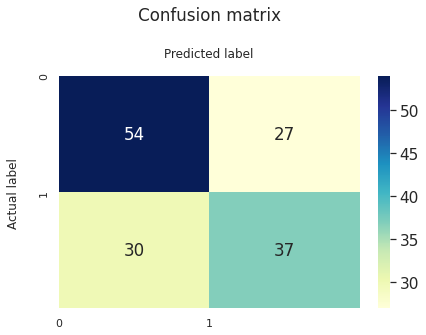

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

Optimal number of features : 1
Best features : Int64Index([0], dtype='int64')


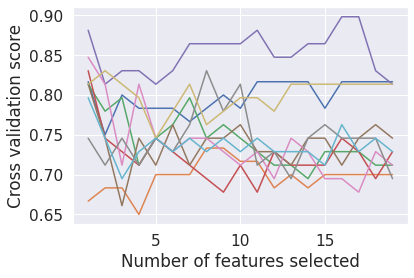

In [ ]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10, scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(x_train).columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 0 (0.248936)
2. feature 8 (0.095201)
3. feature 1 (0.083957)
4. feature 9 (0.078296)
5. feature 4 (0.073571)
6. feature 2 (0.072915)
7. feature 3 (0.045390)
8. feature 10 (0.039301)
9. feature 6 (0.038371)
10. feature 7 (0.035667)
11. feature 16 (0.032377)
12. feature 17 (0.032267)
13. feature 18 (0.031497)
14. feature 12 (0.029589)
15. feature 5 (0.028924)
16. feature 15 (0.010677)
17. feature 13 (0.009901)
18. feature 11 (0.008120)
19. feature 14 (0.005042)


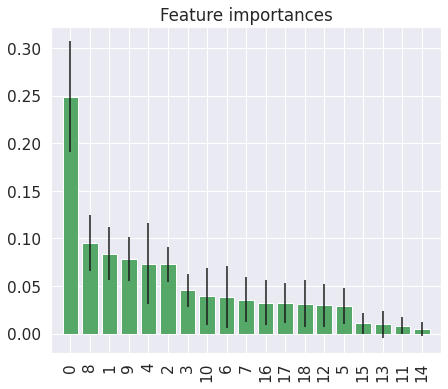

In [ ]:
# feature set importance
feat_labels = df.columns[1:]
forest = RandomForestClassifier(random_state = 1)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([forest.feature_importances_ for forest in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
  
# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
  print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(1, figsize=(7, 6))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), pd.DataFrame(x_train).columns[indices],rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.show()

In [ ]:
X = df['Reason for absence']
y = df['Absenteeism time in hours']
sc = StandardScaler()
X = sc.fit_transform(X.array.reshape(-1, 1))
y = sc.fit_transform(y.array.reshape(-1, 1))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression().fit(x_train, y_train)
score = reg.score(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
print(score)

0.032186512535424705


In [ ]:
X = df['Reason for absence']
y = np.where(df["Absenteeism time in hours"] > df["Absenteeism time in hours"].median(), 1, 0)

X = sc.fit_transform(X.array.reshape(-1, 1))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=1, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  # roc_auc scoring:
  cv_auc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_auc_results.mean()*100, 2),
                          round(cv_auc_results.std()*100, 2),
                          round(cv_acc_results.mean()*100, 2),
                          round(cv_acc_results.std()*100, 2)
                          ]
  i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
5,Decision Tree Classifier,85.08,4.36,80.08,4.06
6,Random Forest,83.80,3.72,78.05,3.63
3,KNN,73.07,5.87,73.16,6.19
2,Kernel SVM,70.43,6.20,69.94,5.93
4,Gaussian NB,70.18,7.48,64.55,9.05
0,Logistic Regression,66.58,7.06,65.88,6.87
1,SVC,66.58,7.06,60.32,7.82


No handles with labels found to put in legend.


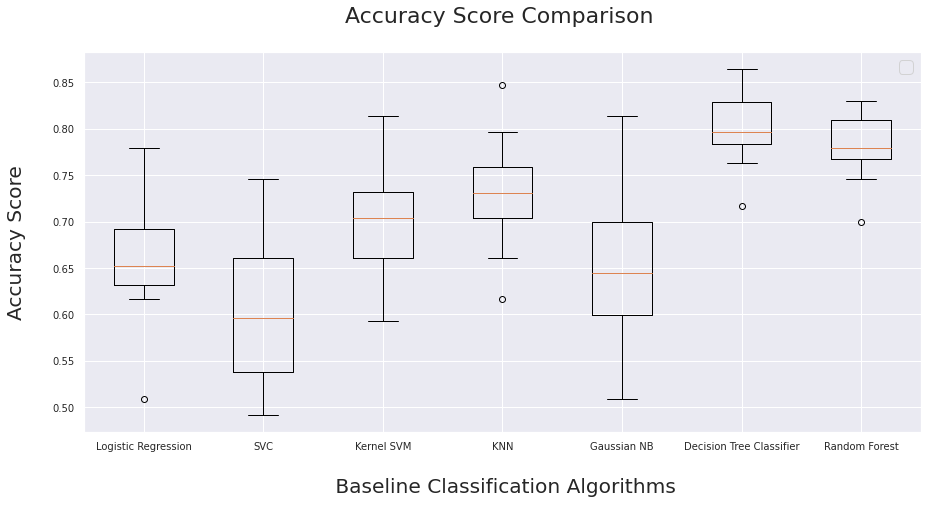

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", fontsize = "10")
plt.yticks(rotation=0, horizontalalignment="right", fontsize = "10")
plt.show()

No handles with labels found to put in legend.


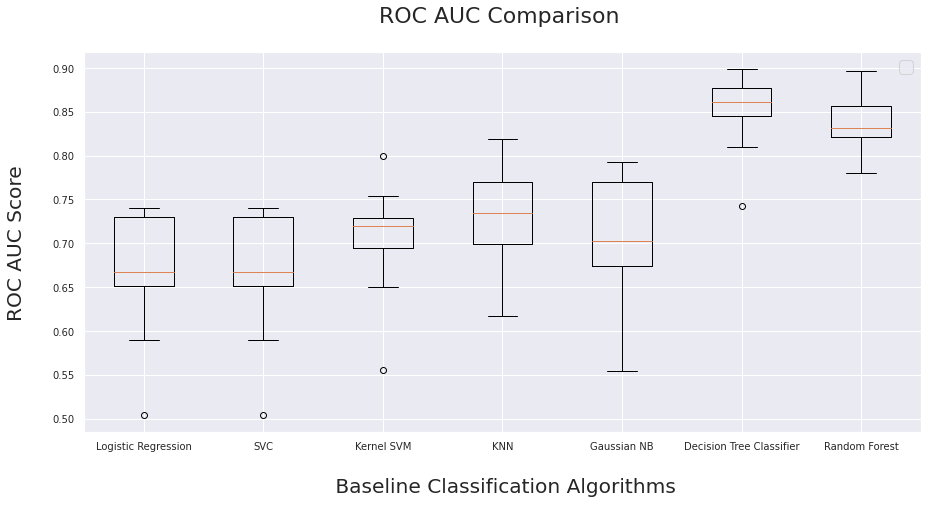

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", fontsize = "10")
plt.yticks(rotation=0, horizontalalignment="right", fontsize = "10")
plt.show()

In [ ]:
accuracies = cross_val_score(estimator = DecisionTreeClassifier(criterion = 'entropy', random_state = 0), X = x_train, y = y_train, cv = 10)
print("Decision Tree Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Decision Tree Classifier Accuracy: 0.80 (+/- 0.11)


Text(0.5, 7.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

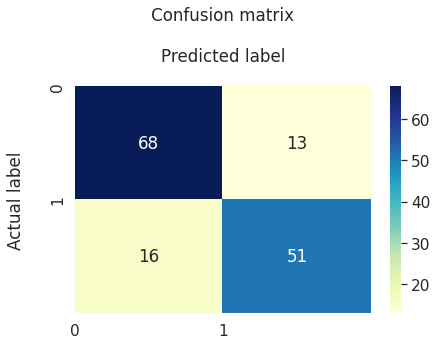

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(x_test)

import seaborn as sns
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')